<h3> Importowanie najwazniejszych bibliotek <h3>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, f_oneway, kruskal, mannwhitneyu
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
# Importowanie pliku z danymi. Pliki z danymi to EDC3, Pab1, HSP104
file_name = 'data/EDC3.xlsx'
# zczytanie danych
data = pd.read_excel(file_name)

In [3]:
# wizualizacja struktury danych
data =  data.dropna(subset=["Nazwa"])
data.tail(10)


,Nazwa,"Ilosc kom,","Ilosc kom, fluo",photo area,Intensywnosc swiecenia,std,proba
228,vk mut,9,0,5002624,0.000,0.000,3
229,vk mut,10,0,5002624,0.000,0.000,3
230,vk mut,12,0,5002624,0.000,0.000,3
231,vk mut,7,0,5002624,0.000,0.000,3
232,vk mut,8,0,5002624,0.000,0.000,3
233,vk mut,8,3,5002624,0.530,8.500,3
234,vk mut,16,0,5002624,0.000,0.000,3
235,vk mut,8,2,5002624,0.267,5.690,3
236,vk mut,7,1,5002624,0.228,5.395,3
237,vk mut,14,0,5002624,0.000,0.000,3


<h2> Testy statystyczne dla średniej intensywności świecenia <h2>

In [4]:
name_of_yeasts = ['By', 'VPS[-]', 'vps tef', 'vps mut', 'VK[-]', 'vk tef', 'vk mut']
mean_dict = {}
for name in name_of_yeasts:
    sum_of_density = 0
    number_of_elements = 0
    for i in range(len(data)):
        if name == data['Nazwa'][i]:
            sum_of_density += data["Intensywnosc swiecenia"][i]
            number_of_elements += 1
    mean_dict[name] = sum_of_density/number_of_elements
print(mean_dict)

data['mean'] = data['Nazwa'].map(mean_dict)
grouped_data = data.groupby('Nazwa')['Intensywnosc swiecenia'].std().reset_index()
data = pd.merge(data, grouped_data, how='left', left_on='Nazwa', right_on='Nazwa')
data = data.rename(columns={'Intensywnosc swiecenia_y': 'standard_deviation'})

data['standarized_density'] = (data['Intensywnosc swiecenia_x'] - data['mean']) / data['standard_deviation']



{'By': 0.6021666666666667, 'VPS[-]': 1.0366944444444446, 'vps tef': 1.5854722222222222, 'vps mut': 1.0809411764705879, 'VK[-]': 1.0732727272727272, 'vk tef': 0.979060606060606, 'vk mut': 0.3351333333333332}


In [5]:
data.tail(10)

,Nazwa,"Ilosc kom,","Ilosc kom, fluo",photo area,Intensywnosc swiecenia_x,std,proba,mean,standard_deviation,standarized_density
228,vk mut,9,0,5002624,0.000,0.000,3,0.335133,0.504316,-0.664531
229,vk mut,10,0,5002624,0.000,0.000,3,0.335133,0.504316,-0.664531
230,vk mut,12,0,5002624,0.000,0.000,3,0.335133,0.504316,-0.664531
231,vk mut,7,0,5002624,0.000,0.000,3,0.335133,0.504316,-0.664531
232,vk mut,8,0,5002624,0.000,0.000,3,0.335133,0.504316,-0.664531
233,vk mut,8,3,5002624,0.530,8.500,3,0.335133,0.504316,0.386398
234,vk mut,16,0,5002624,0.000,0.000,3,0.335133,0.504316,-0.664531
235,vk mut,8,2,5002624,0.267,5.690,3,0.335133,0.504316,-0.135101
236,vk mut,7,1,5002624,0.228,5.395,3,0.335133,0.504316,-0.212433
237,vk mut,14,0,5002624,0.000,0.000,3,0.335133,0.504316,-0.664531


Statystyka testowa: 0.8874708414077759, P-value: 2.6073091168726803e-12
Dane nie mają rozkładu normalnego.


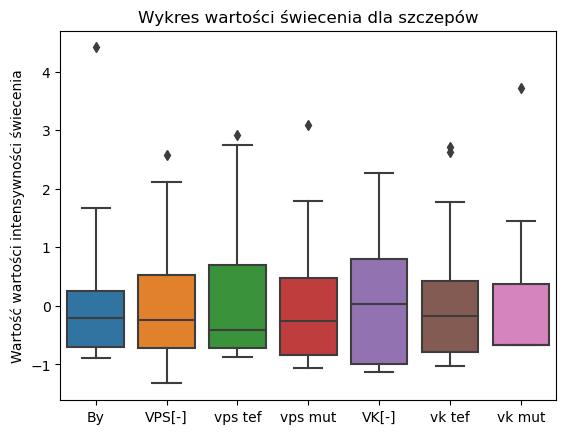

Test Kruskala-Wallisa: Statystyka testowa: 29.914534854821984, P-value: 4.080661436920008e-05
Test Mann-Whitney dla By i VPS[-]: Statystyka testowa: 397.0, P-value: 0.0047843833903502015
Test Mann-Whitney dla By i vps tef: Statystyka testowa: 473.0, P-value: 0.04938122122258874
Test Mann-Whitney dla By i vps mut: Statystyka testowa: 443.0, P-value: 0.04770073433671893
Test Mann-Whitney dla By i VK[-]: Statystyka testowa: 461.5, P-value: 0.11263134109502046
Test Mann-Whitney dla By i vk tef: Statystyka testowa: 477.0, P-value: 0.16163791687103157
Test Mann-Whitney dla By i vk mut: Statystyka testowa: 773.0, P-value: 0.0025650068411015524
Test Mann-Whitney dla VPS[-] i vps tef: Statystyka testowa: 636.5, P-value: 0.901404605256086
Test Mann-Whitney dla VPS[-] i vps mut: Statystyka testowa: 639.5, P-value: 0.7510293750776813
Test Mann-Whitney dla VPS[-] i VK[-]: Statystyka testowa: 623.0, P-value: 0.7319509511018744
Test Mann-Whitney dla VPS[-] i vk tef: Statystyka testowa: 663.0, P-value

In [20]:
alpha = 0.05
stat, p_value = shapiro(data['standarized_density'])
print(f'Statystyka testowa: {stat}, P-value: {p_value}')

if p_value > alpha:
    print("Dane mają rozkład normalny.")
    # Wykres rozkładu normalnego
    sns.histplot(data['standarized_density'], kde=True)
    plt.title('Rozkład Normalny po Standaryzacji')
    plt.show()

    # Test ANOVA (parametryczny)
    wyniki_anova = f_oneway(
        data['standarized_density'][data['Nazwa'] == 'By'],
        data['standarized_density'][data['Nazwa'] == 'VPS[-]'],
        data['standarized_density'][data['Nazwa'] == 'vps tef'],
        data['standarized_density'][data['Nazwa'] == 'vps mut'],
        data['standarized_density'][data['Nazwa'] == 'VK[-]'],
        data['standarized_density'][data['Nazwa'] == 'vk tef'],
        data['standarized_density'][data['Nazwa'] == 'vk mut'],
    )

    print(f'Test ANOVA: Statystyka testowa: {wyniki_anova.statistic}, P-value: {wyniki_anova.pvalue}')

    if wyniki_anova.pvalue < alpha:
        # testy post hoc (Tukey HSD)
        tukey_results = pairwise_tukeyhsd(data['standarized_density'], data['Nazwa'])
        print(tukey_results)

        # Wykres pudełkowy z oznaczeniem istotnych różnic
        sns.boxplot(x='Nazwa', y='standarized_density', data=data)
        plt.title('Rozkład Intensywności Świecenia z Oznaczeniem Różnic Istotnych')
        plt.show()
    else:
        print("Brak istotnych różnic między grupami.")

else:
    print("Dane nie mają rozkładu normalnego.")
    # Wykres rozkładu nieparametrycznego
    sns.boxplot(x='Nazwa', y='standarized_density', data=data)
    plt.title('Wykres wartości świecenia dla szczepów')
    plt.ylabel('Wartość wartości intensywności świecenia')  # Zmiana etykiety osi Y
    plt.xlabel('')
    plt.show()
    median_dict = {}
    for name in name_of_yeasts:
        median_dict[name] = data.loc[data['Nazwa'] == name, 'Intensywnosc swiecenia_x'].median()

    data['median'] = data['Nazwa'].map(median_dict)

    # Test Kruskala-Wallisa
    stat, p_value = kruskal(
        data.loc[data['Nazwa'] == 'By', 'Intensywnosc swiecenia_x'],
        data.loc[data['Nazwa'] == 'VPS[-]', 'Intensywnosc swiecenia_x'],
        data.loc[data['Nazwa'] == 'vps tef', 'Intensywnosc swiecenia_x'],
        data.loc[data['Nazwa'] == 'vps mut', 'Intensywnosc swiecenia_x'],
        data.loc[data['Nazwa'] == 'VK[-]', 'Intensywnosc swiecenia_x'],
        data.loc[data['Nazwa'] == 'vk tef', 'Intensywnosc swiecenia_x'],
        data.loc[data['Nazwa'] == 'vk mut', 'Intensywnosc swiecenia_x'],
    )

    if p_value < alpha:
        print(f'Test Kruskala-Wallisa: Statystyka testowa: {stat}, P-value: {p_value}')

        # Testy porównawcze (Mann-Whitney)
        for i in range(len(name_of_yeasts)):
            for j in range(i + 1, len(name_of_yeasts)):
                group1 = data['Intensywnosc swiecenia_x'][data['Nazwa'] == name_of_yeasts[i]]
                group2 = data['Intensywnosc swiecenia_x'][data['Nazwa'] == name_of_yeasts[j]]
                stat, p_value = mannwhitneyu(group1, group2)
                print(f'Test Mann-Whitney dla {name_of_yeasts[i]} i {name_of_yeasts[j]}: Statystyka testowa: {stat}, P-value: {p_value}')





<h2> Testy statystyczne dla średniej ilości wystąpień agregatów bialkowych z wstawką fluorescencyjną <h2>

In [7]:
data["ratio fluorescence/cells"] = data["Ilosc kom, fluo"] / data["Ilosc kom,"]
number_of_yeast = {}
for name in name_of_yeasts:
    count_yeast = 0
    count_fluoro = 0
    for i in range(len(data)):
        if data["Nazwa"][i] == name:
            count_yeast += data["Ilosc kom,"][i]
            count_fluoro += data["Ilosc kom, fluo"][i]
    number_of_yeast[f"light_yeast_{name}"] = count_yeast
    number_of_yeast[f"fluoro_yeast_{name}"] = count_fluoro

print(number_of_yeast)
#data.tail()

{'light_yeast_By': 834, 'fluoro_yeast_By': 459, 'light_yeast_VPS[-]': 695, 'fluoro_yeast_VPS[-]': 379, 'light_yeast_vps tef': 676, 'fluoro_yeast_vps tef': 417, 'light_yeast_vps mut': 536, 'fluoro_yeast_vps mut': 267, 'light_yeast_VK[-]': 462, 'fluoro_yeast_VK[-]': 268, 'light_yeast_vk tef': 494, 'fluoro_yeast_vk tef': 229, 'light_yeast_vk mut': 379, 'fluoro_yeast_vk mut': 63}


Statystyka testowa: 0.9155451655387878, P-value: 2.280629712858584e-10
Dane nie mają rozkładu normalnego.


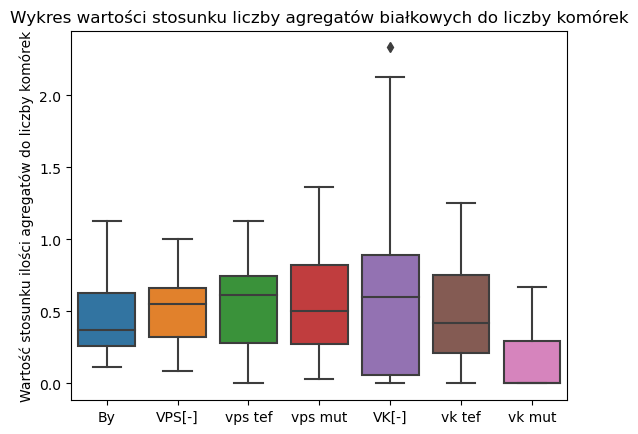

Test Kruskala-Wallisa: Statystyka testowa: 34.648014342484664, P-value: 5.041754570987842e-06
Test Mann-Whitney dla By i VPS[-]: Statystyka testowa: 542.0, P-value: 0.23470938520418827
Test Mann-Whitney dla By i vps tef: Statystyka testowa: 560.5, P-value: 0.32710536371580534
Test Mann-Whitney dla By i vps mut: Statystyka testowa: 540.5, P-value: 0.4040716467251454
Test Mann-Whitney dla By i VK[-]: Statystyka testowa: 549.5, P-value: 0.5968829733528958
Test Mann-Whitney dla By i vk tef: Statystyka testowa: 622.5, P-value: 0.7365583001139518
Test Mann-Whitney dla By i vk mut: Statystyka testowa: 896.5, P-value: 3.879718202838999e-06
Test Mann-Whitney dla VPS[-] i vps tef: Statystyka testowa: 617.5, P-value: 0.7354109552587049
Test Mann-Whitney dla VPS[-] i vps mut: Statystyka testowa: 606.5, P-value: 0.9531395015218741
Test Mann-Whitney dla VPS[-] i VK[-]: Statystyka testowa: 580.5, P-value: 0.8758329212442835
Test Mann-Whitney dla VPS[-] i vk tef: Statystyka testowa: 696.5, P-value: 0.

In [21]:
alpha = 0.05
stat, p_value = shapiro(data['ratio fluorescence/cells'])
print(f'Statystyka testowa: {stat}, P-value: {p_value}')

if p_value > alpha:
    print("Dane mają rozkład normalny.")
    # Wykres rozkładu normalnego
    sns.histplot(data['ratio fluorescence/cells'], kde=True)
    plt.title('Rozkład Normalny dla ratio ilości komórek z fluorescencyjnymi agregatami białkowymi do ilości komórek')
    plt.show()

    # Test ANOVA (parametryczny)
    wyniki_anova = f_oneway(
        data['ratio fluorescence/cells'][data['Nazwa'] == 'By'],
        data['ratio fluorescence/cells'][data['Nazwa'] == 'VPS[-]'],
        data['ratio fluorescence/cells'][data['Nazwa'] == 'vps tef'],
        data['ratio fluorescence/cells'][data['Nazwa'] == 'vps mut'],
        data['ratio fluorescence/cells'][data['Nazwa'] == 'VK[-]'],
        data['ratio fluorescence/cells'][data['Nazwa'] == 'vk tef'],
        data['ratio fluorescence/cells'][data['Nazwa'] == 'vk mut'],
    )

    print(f'Test ANOVA: Statystyka testowa: {wyniki_anova.statistic}, P-value: {wyniki_anova.pvalue}')

    if wyniki_anova.pvalue < alpha:
        # testy post hoc (Tukey HSD)
        tukey_results = pairwise_tukeyhsd(data['ratio fluorescence/cells'], data['Nazwa'])
        print(tukey_results)

        # Wykres pudełkowy z oznaczeniem istotnych różnic
        sns.boxplot(x='Nazwa', y='ratio fluorescence/cells', data=data)
        plt.title('Wykres ilości wystąpień agregatów białkowych ze wstawką fluorescencyjną do ilości komórek')
        plt.show()
    else:
        print("Brak istotnych różnic między grupami.")

else:
    print("Dane nie mają rozkładu normalnego.")
    # Wykres rozkładu nieparametrycznego
    boxplot = sns.boxplot(x='Nazwa', y='ratio fluorescence/cells', data=data)
    plt.title('Wykres wartości stosunku liczby agregatów białkowych do liczby komórek')
    plt.xlabel('')
    plt.ylabel('Wartość stosunku ilości agregatów do liczby komórek')  # Zmiana etykiety osi Y
    plt.show()
    median_dict = {}
    for name in name_of_yeasts:
        median_dict[name] = data.loc[data['Nazwa'] == name, 'ratio fluorescence/cells'].median()

    data['median'] = data['Nazwa'].map(median_dict)

    # Test Kruskala-Wallisa
    stat, p_value = kruskal(
        data.loc[data['Nazwa'] == 'By', 'ratio fluorescence/cells'],
        data.loc[data['Nazwa'] == 'VPS[-]', 'ratio fluorescence/cells'],
        data.loc[data['Nazwa'] == 'vps tef', 'ratio fluorescence/cells'],
        data.loc[data['Nazwa'] == 'vps mut', 'ratio fluorescence/cells'],
        data.loc[data['Nazwa'] == 'VK[-]', 'ratio fluorescence/cells'],
        data.loc[data['Nazwa'] == 'vk tef', 'ratio fluorescence/cells'],
        data.loc[data['Nazwa'] == 'vk mut', 'ratio fluorescence/cells'],
    )

    if p_value < alpha:
        print(f'Test Kruskala-Wallisa: Statystyka testowa: {stat}, P-value: {p_value}')

        # Testy porównawcze (Mann-Whitney)
        for i in range(len(name_of_yeasts)):
            for j in range(i + 1, len(name_of_yeasts)):
                group1 = data['ratio fluorescence/cells'][data['Nazwa'] == name_of_yeasts[i]]
                group2 = data['ratio fluorescence/cells'][data['Nazwa'] == name_of_yeasts[j]]
                stat, p_value = mannwhitneyu(group1, group2)
                print(f'Test Mann-Whitney dla {name_of_yeasts[i]} i {name_of_yeasts[j]}: Statystyka testowa: {stat}, P-value: {p_value}')

    else: 
        print(f"Nie ma istotnych zmian pomiędzy grupami. Wartosc p-value ")

In [9]:
data.head(10)

,Nazwa,"Ilosc kom,","Ilosc kom, fluo",photo area,Intensywnosc swiecenia_x,std,proba,mean,standard_deviation,standarized_density,median,ratio fluorescence/cells
0,By,24,19,5002624,1.640,14.256,1,0.602167,0.640235,1.621020,0.371711,0.791667
1,By,84,81,5002624,3.426,23.187,1,0.602167,0.640235,4.410621,0.371711,0.964286
2,By,16,5,5002624,0.080,3.704,1,0.602167,0.640235,-0.815586,0.371711,0.312500
3,By,10,5,5002624,0.049,2.856,1,0.602167,0.640235,-0.864006,0.371711,0.500000
4,By,15,11,5002624,0.833,11.219,1,0.602167,0.640235,0.360545,0.371711,0.733333
5,By,8,9,5002624,0.079,3.196,1,0.602167,0.640235,-0.817148,0.371711,1.125000
6,By,25,23,5002624,1.240,12.357,1,0.602167,0.640235,0.996249,0.371711,0.920000
7,By,28,22,5002624,1.064,11.423,1,0.602167,0.640235,0.721350,0.371711,0.785714
8,By,43,27,5002624,0.670,10.718,1,0.602167,0.640235,0.105951,0.371711,0.627907
9,By,82,87,5002624,1.677,17.297,1,0.602167,0.640235,1.678811,0.371711,1.060976
